# ANLY590 HW2
## Jun Wang 
(collaborated with Kornraphop Kawintiranon)
## 11/24/2018

## 1. Autoencoder

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

#the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [30]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 130us/step - loss: 0.3671 - val_loss: 0.3276
Epoch 2/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.3202 - val_loss: 0.3170
Epoch 3/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.3119 - val_loss: 0.3096
Epoch 4/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.3066 - val_loss: 0.3059
Epoch 5/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.3036 - val_loss: 0.3048
Epoch 6/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.3014 - val_loss: 0.3015
Epoch 7/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.2998 - val_loss: 0.3005
Epoch 8/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.2986 - val_loss: 0.3038
Epoch 9/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.2969 - val_loss: 0.3

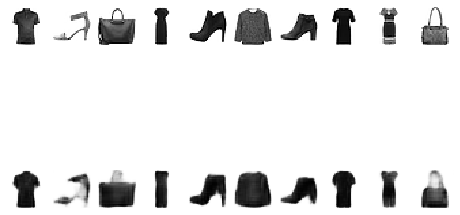

In [31]:
# Choose 10 random images in the testset and comapre them 
decoded_imgs = autoencoder.predict(x_test)
index = np.random.randint(10000, size=10)
f, axarr = plt.subplots(2, 10)
for i in range(10):
    axarr[0,i].imshow(x_test[index[i]].reshape(28, 28))
    axarr[0,i].get_xaxis().set_visible(False)
    axarr[0,i].get_yaxis().set_visible(False)
    axarr[1,i].imshow(decoded_imgs[index[i]].reshape(28, 28))
    axarr[1,i].get_xaxis().set_visible(False)
    axarr[1,i].get_yaxis().set_visible(False)

## 2. Image Classification
### 2.1 Deep CNN
__Descroption of architectural choices:__ <br>
Number of kernels: 32<br>
Kernel size: 3 by 3<br>
Strides: 2<br>
Padding: "same" (padding the input such that the output has the same length as the original input)<br>
Network depth: 256

In [32]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)


In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten
import keras

#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 padding="same",
                 activation='relu',
                 strides=(2, 2),
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 5, 5, 64)          18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 576)               0         
__________

In [34]:
#model training
model_log = model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.8496 - acc: 0.6819 - val_loss: 0.5388 - val_acc: 0.7926
Epoch 2/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.5701 - acc: 0.7868 - val_loss: 0.4639 - val_acc: 0.8243
Epoch 3/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.5040 - acc: 0.8161 - val_loss: 0.4045 - val_acc: 0.8498
Epoch 4/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.4563 - acc: 0.8325 - val_loss: 0.3817 - val_acc: 0.8576
Epoch 5/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.4286 - acc: 0.8451 - val_loss: 0.3682 - val_acc: 0.8668
Epoch 6/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.4069 - acc: 0.8541 - val_loss: 0.3405 - val_acc: 0.8772
Epoch 7/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.3898 - acc: 0.8600 - val_loss: 0.3307 - val_ac

In [35]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Training loss:', train_score[0]) 
print('Training accuracy:', train_score[1])

Training loss: 0.231380218368272
Training accuracy: 0.9143833333333333


In [36]:
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Test loss: 0.2761221510529518
Test accuracy: 0.8984


### 2.2 Transfer Learning

In [37]:
import cv2
from keras.applications import VGG16

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
num_category = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

# converting it to RGB
x_train = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_train]
x_train = np.concatenate([arr[np.newaxis] for arr in x_train]).astype('float32')
x_test = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_test]
x_test = np.concatenate([arr[np.newaxis] for arr in x_test]).astype('float32')
conv_base = VGG16(weights='imagenet', include_top=False,input_shape = (32,32,3))
for layer in conv_base.layers:
    layer.trainable = False

    
model = Sequential()
model.add(conv_base)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total para

In [38]:
#model training
model_log = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 399us/step - loss: 1.6732 - acc: 0.5436 - val_loss: 0.7207 - val_acc: 0.7481
Epoch 2/20
60000/60000 [==============================] - 22s 370us/step - loss: 0.9307 - acc: 0.6712 - val_loss: 0.6365 - val_acc: 0.7667
Epoch 3/20
60000/60000 [==============================] - 22s 370us/step - loss: 0.8204 - acc: 0.7051 - val_loss: 0.5802 - val_acc: 0.7932
Epoch 4/20
60000/60000 [==============================] - 22s 372us/step - loss: 0.7586 - acc: 0.7275 - val_loss: 0.5820 - val_acc: 0.7893
Epoch 5/20
60000/60000 [==============================] - 22s 371us/step - loss: 0.7120 - acc: 0.7439 - val_loss: 0.5503 - val_acc: 0.8043
Epoch 6/20
60000/60000 [==============================] - 22s 370us/step - loss: 0.6952 - acc: 0.7532 - val_loss: 0.5476 - val_acc: 0.7988
Epoch 7/20
60000/60000 [==============================] - 22s 370us/step - loss: 0.6707 - acc: 0.7590 - val_loss: 0.

In [39]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Training loss:', train_score[0]) 
print('Training accuracy:', train_score[1])

Training loss: 0.39461324273347853
Training accuracy: 0.8580333333333333


In [40]:
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0]) 
print('Test accuracy:', test_score[1])

Test loss: 0.46427107996940614
Test accuracy: 0.834


## 3. Text Classification
### 3.1 RNN

In [41]:
from keras.utils.data_utils import get_file
import io
from keras.preprocessing.text import one_hot
from keras.preprocessing import sequence
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Convolution1D
from keras.optimizers import SGD
from keras.layers.embeddings import Embedding
import seaborn as sns
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop


benign = get_file('benign',
    origin='https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt')

with io.open(benign, encoding='utf-8') as f:
    lines = f.readlines()
#    print(lines)
benign_srt = []
for i in lines:
    if i[0]!='#':
        i = i.rstrip("\n\r")
        benign_srt.append(i.lower()) 

len(benign_srt)

malicious = get_file('malicious',
    origin='https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt')

with io.open(malicious, encoding='utf-8') as f:
    lines = f.readlines()
#    print(lines)
malicious_srt = []
for i in lines:
    if i[0]!='#':
        i = i.rstrip("\n\r")
        malicious_srt.append(i.lower()) 
        
len(malicious_srt)


tot_str = benign_srt+malicious_srt

my_lst_str = ''.join(map(str, tot_str))


chars = sorted(list(set(my_lst_str)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
max_len = max([len(i) for i in tot_str])


X = np.zeros((len(tot_str), max_len, len(chars)), dtype=np.uint8 )
Y = np.concatenate([np.zeros(len(benign_srt)), np.ones(len(malicious_srt)) ])
for i, seq in enumerate(tot_str):
    for t, char in enumerate(seq):
        X[i, t, char_indices[char]] = 1


index = random.sample(range(len(Y)), len(Y))
X_shuffle = X[index]
Y_shuffle = Y[index]
split = int(len(Y)*0.75)
X_train = X_shuffle[:split,:].astype(int)
Y_train = Y_shuffle[:split,].astype(int)
X_test = X_shuffle[split:,:].astype(int)
Y_test = Y_shuffle[split:,].astype(int)


model_1 = Sequential()
model_1.add(LSTM(256, input_shape=(max_len, len(chars))))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model_1.summary()

total chars: 41
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 256)               305152    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 257       
Total params: 305,409
Trainable params: 305,409
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_log = model_1.fit(X_train, Y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 50483 samples, validate on 16828 samples
Epoch 1/10
50483/50483 [==============================] - 52s 1ms/step - loss: 0.1159 - acc: 0.9800 - val_loss: 0.0998 - val_acc: 0.9796
Epoch 2/10
50483/50483 [==============================] - 51s 1ms/step - loss: 0.0943 - acc: 0.9811 - val_loss: 0.1003 - val_acc: 0.9796
Epoch 3/10
50483/50483 [==============================] - 51s 1ms/step - loss: 0.0940 - acc: 0.9811 - val_loss: 0.1004 - val_acc: 0.9796
Epoch 4/10
50483/50483 [==============================] - 51s 1ms/step - loss: 0.0939 - acc: 0.9811 - val_loss: 0.0998 - val_acc: 0.9796
Epoch 5/10
50483/50483 [==============================] - 51s 1ms/step - loss: 0.0940 - acc: 0.9811 - val_loss: 0.1004 - val_acc: 0.9796
Epoch 6/10
50483/50483 [==============================] - 51s 1ms/step - loss: 0.0940 - acc: 0.9811 - val_loss: 0.0999 - val_acc: 0.9796
Epoch 7/10
50483/50483 [==============================] - 51s 1ms/step - loss: 0.0939 - acc: 0.9811 - val_loss: 0.0998 - val_acc

In [43]:
train_score = model_1.evaluate(X_train, Y_train, verbose=0)
print('Training loss:', train_score[0]) 
print('Training accuracy:', train_score[1])

Training loss: 0.09357164035679336
Training accuracy: 0.9811421666699681


In [44]:
test_score = model_1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', test_score[0]) 
print('Test accuracy:', test_score[1])

Test loss: 0.09989530034053345
Test accuracy: 0.979557879752605


### 3.2 CNN

In [0]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D

model_2 = Sequential()
model_2.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [61]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 86, 128)           26368     
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 43, 128)           0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 5504)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 5505      
Total params: 31,873
Trainable params: 31,873
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_log = model_2.fit(X_train, Y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 50483 samples, validate on 16828 samples
Epoch 1/10
50483/50483 [==============================] - 6s 120us/step - loss: 0.0748 - acc: 0.9802 - val_loss: 0.0521 - val_acc: 0.9796
Epoch 2/10
50483/50483 [==============================] - 5s 94us/step - loss: 0.0390 - acc: 0.9826 - val_loss: 0.0316 - val_acc: 0.9840
Epoch 3/10
50483/50483 [==============================] - 5s 95us/step - loss: 0.0258 - acc: 0.9880 - val_loss: 0.0244 - val_acc: 0.9880
Epoch 4/10
50483/50483 [==============================] - 5s 95us/step - loss: 0.0199 - acc: 0.9912 - val_loss: 0.0210 - val_acc: 0.9911
Epoch 5/10
50483/50483 [==============================] - 5s 94us/step - loss: 0.0162 - acc: 0.9934 - val_loss: 0.0196 - val_acc: 0.9913
Epoch 6/10
50483/50483 [==============================] - 5s 94us/step - loss: 0.0136 - acc: 0.9949 - val_loss: 0.0189 - val_acc: 0.9910
Epoch 7/10
50483/50483 [==============================] - 5s 94us/step - loss: 0.0114 - acc: 0.9960 - val_loss: 0.0184 - val_ac

In [62]:
train_score = model_2.evaluate(X_train, Y_train, verbose=0)
print('Training loss:', train_score[0]) 
print('Training accuracy:', train_score[1])

Training loss: 0.00513452875886593
Training accuracy: 0.9991878454133074


In [63]:
test_score = model_2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', test_score[0]) 
print('Test accuracy:', test_score[1])

Test loss: 0.018324430864456984
Test accuracy: 0.9917993820107462


### 3.3

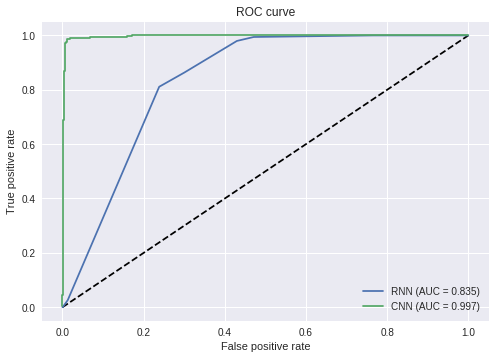

In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_rnn = model_1.predict(X_test).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(Y_test, y_pred_rnn)
auc_rnn = auc(fpr_rnn, tpr_rnn)

y_pred_cnn = model_2.predict(X_test).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(Y_test, y_pred_cnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (AUC = {:.3f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (AUC = {:.3f})'.format(auc_cnn))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc="lower right")
plt.show()